In [1]:
cd C:\Users\xupu\Desktop\个人征信\train

C:\Users\xupu\Desktop\个人征信\train


In [2]:
ls

 驱动器 C 中的卷是 Windows
 卷的序列号是 A0DB-4767

 C:\Users\xupu\Desktop\个人征信\train 的目录

2016/12/14  21:35    <DIR>          .
2016/12/14  21:35    <DIR>          ..
2016/11/08  13:40       189,319,483 bank_detail_train.txt
2016/11/08  13:41       276,451,528 bill_detail_train.txt
2016/11/08  13:46       538,446,684 browse_history_train.txt
2016/11/08  13:47           989,622 loan_time_train.txt
2016/11/08  13:47           489,258 overdue_train.txt
2016/11/08  13:47           934,026 user_info_train.txt
               6 个文件  1,006,630,601 字节
               2 个目录 175,785,635,840 可用字节


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
user_info = pd.read_csv('user_info_train.txt',header=None,names=['user_id','sex','occupation','education','marriage','household'])

In [6]:
user_info.head()

,user_id,sex,occupation,education,marriage,household
0,3150,1,2,4,1,4
1,6965,1,2,4,3,2
2,1265,1,3,4,3,1
3,6360,1,2,4,3,2
4,2583,2,2,2,1,1


In [7]:
bank_detail = pd.read_csv('bank_detail_train.txt',header=None,names=['user_id','tm_encode','trade_type','trade_amount','salary_tag'])

In [8]:
bank_detail.head()

,user_id,tm_encode,trade_type,trade_amount,salary_tag
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


In [44]:
grouped0 = bank_detail.groupby(['user_id','trade_type'])

In [45]:
income = grouped0['trade_amount'].sum().unstack()

In [46]:
income.rename(columns={0:'shouru',1:'zhichu'},inplace = True)

In [47]:
income['netincome'] = income['shouru']-income['zhichu']

In [48]:
incomes = income['netincome']

In [49]:
tag1 = bank_detail.loc[bank_detail['salary_tag']==1]

In [50]:
tag1.head()

,user_id,tm_encode,trade_type,trade_amount,salary_tag
1632,29165,5899303887,0,14.847955,1
1684,29165,5901982287,0,14.717024,1
1740,29165,5904747087,0,14.637385,1
1785,29165,5907252687,0,14.911227,1
1824,29165,5909931087,0,14.931199,1


In [51]:
salary = tag1.groupby('user_id')['trade_amount'].mean()

In [52]:
salary.head()

user_id
36    13.043108
38    10.884391
44    15.221781
67    12.281847
97    13.149357
Name: trade_amount, dtype: float64

In [53]:
bank = pd.concat([incomes,salary],axis=1)

In [54]:
bank.head()

,netincome,trade_amount
user_id,,
1,-195.332507,NaN
3,-2707.084161,NaN
4,-965.083338,NaN
9,45.288586,NaN
10,-456.650397,NaN


In [55]:
bank.shape

(9294, 2)

In [56]:
new_bank = bank.reset_index()#合并到总表

In [57]:
new_bank.loc[new_bank['trade_amount'].isnull(),'tag']=0

In [61]:
new_bank.loc[new_bank['trade_amount'].notnull(),'tag']=1

In [62]:
new_bank.head()

,user_id,netincome,trade_amount,tag
0,1,-195.332507,NaN,0.0
1,3,-2707.084161,NaN,0.0
2,4,-965.083338,NaN,0.0
3,9,45.288586,NaN,0.0
4,10,-456.650397,NaN,0.0


In [63]:
new_bank.tail()

,user_id,netincome,trade_amount,tag
9289,55547,-1036.376526,NaN,0.0
9290,55571,-47.662166,NaN,0.0
9291,55583,-1958.071448,NaN,0.0
9292,55586,-2369.779287,NaN,0.0
9293,55587,-2632.930080,14.481598,1.0


In [64]:
bill_detail = pd.read_csv('bill_detail_train.txt',header=None,names=['user_id','tm_encode','bank_id','last_bill','last_return','credit_amount','this_bill_left','minreturn_bill','use_times','this_bill_amount','adjust_amount','recircle_rate','left_amount','load_amount','return_item'])

In [65]:
bill_detail.head()

,user_id,tm_encode,bank_id,last_bill,last_return,credit_amount,this_bill_left,minreturn_bill,use_times,this_bill_amount,adjust_amount,recircle_rate,left_amount,load_amount,return_item
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [66]:
bill_detail['last_return_diff']=bill_detail['last_return']-bill_detail['last_bill']

In [67]:
bill_detail = bill_detail.drop(['tm_encode','last_bill','last_return','minreturn_bill','use_times','adjust_amount'],axis=1)

In [68]:
grouped2 = bill_detail.groupby('user_id')

In [69]:
crdits = grouped2['bank_id'].unique()

In [70]:
c = pd.DataFrame(columns=['user_id','cards'])
for index in crdits.index:
    c = c.append(pd.Series({'user_id':index,'cards':len(crdits[index])}),ignore_index=True)

In [71]:
c['user_id']=c['user_id'].astype(np.int64)

In [72]:
grouped1 = bill_detail.groupby(['user_id','bank_id'])

In [73]:
credit_amount = (grouped1['credit_amount'].sum())/(grouped1['credit_amount'].size())

In [74]:
credit_amounts = pd.DataFrame(credit_amount).reset_index()

In [75]:
credit_amounts.rename(columns={0:'edu'},inplace=True)

In [76]:
user_credit_amount = pd.DataFrame(credit_amounts.groupby('user_id')['edu'].sum())

In [77]:
user_credit_amount = user_credit_amount.reset_index()

In [78]:
user_rate = grouped2['recircle_rate','last_return_diff'].sum().reset_index()

In [79]:
user_loan = pd.DataFrame(grouped2['load_amount'].mean()).reset_index()

In [80]:
d = pd.merge(c,user_credit_amount,on='user_id')

In [81]:
e = pd.merge(d,user_rate,on='user_id')

In [82]:
f = pd.merge(e,user_loan,on='user_id') #合并到总表

In [83]:
f.shape

(53174, 6)

In [84]:
f.head()

,user_id,cards,edu,recircle_rate,last_return_diff,load_amount
0,2,3.0,56.809799,0.0,-9.347233,7.087560
1,3,1.0,18.361833,0.0,0.426806,0.000000
2,4,3.0,42.305613,0.0,-83.497208,7.808445
3,5,1.0,20.664418,0.0,-4.278933,19.971271
4,6,3.0,61.774130,0.0,-74.384600,13.788434


In [85]:
overdue = pd.read_csv('overdue_train.txt',header=None,names=['user_id','target'])

In [86]:
overdue.shape

(55596, 2)

In [87]:
overdue.head()

,user_id,target
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [88]:
df = pd.merge(user_info,overdue,on='user_id')

In [89]:
df.shape

(55596, 7)

In [90]:
df1 = pd.merge(df,f,on='user_id',how='left')

In [91]:
df2 = pd.merge(df1,new_bank,on='user_id',how='left')

In [92]:
df2.shape

(55596, 15)

In [107]:
df2.head()

,user_id,sex,occupation,education,marriage,household,target,cards,edu,recircle_rate,last_return_diff,load_amount,netincome,trade_amount,tag
0,3150,1,2,4,1,4,0,5.0,82.563651,0.000000,29.604743,13.862981,-3009.678157,0.0,0.0
1,6965,1,2,4,3,2,0,2.0,39.942542,62.082722,10.922189,19.624697,-2261.681747,0.0,0.0
2,1265,1,3,4,3,1,0,2.0,39.959643,279.476096,-190.300944,9.702118,-1954.250868,0.0,0.0
3,6360,1,2,4,3,2,0,8.0,129.424333,1161.246092,-235.075394,13.169416,-3009.678157,0.0,0.0
4,2583,2,2,2,1,1,0,3.0,57.061862,155.478508,1.760083,11.014650,-4327.835360,0.0,0.0


In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55596 entries, 0 to 55595
Data columns (total 15 columns):
user_id             55596 non-null int64
sex                 55596 non-null int64
occupation          55596 non-null int64
education           55596 non-null int64
marriage            55596 non-null int64
household           55596 non-null int64
target              55596 non-null int64
cards               55596 non-null float64
edu                 55596 non-null float64
recircle_rate       55596 non-null float64
last_return_diff    55596 non-null float64
load_amount         55596 non-null float64
netincome           55596 non-null float64
trade_amount        55596 non-null float64
tag                 55596 non-null float64
dtypes: float64(8), int64(7)
memory usage: 6.8 MB


In [94]:
df2['netincome'].fillna(df2['netincome'].mean(),inplace=True)

In [98]:
df2['trade_amount'].fillna(0,inplace=True)

In [100]:
df2['tag'].fillna(0,inplace=True)

In [110]:
df2 = df2.fillna(df2.mean(),inplace=True)

In [180]:
X = df2.drop(['user_id','target'],axis=1)
Y = df2['target']

In [181]:
from sklearn.cross_validation import train_test_split

In [182]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.7)

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
ss = StandardScaler()

In [185]:
ss.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [186]:
trainx = ss.transform(xtrain)
testx = ss.transform(xtest)

In [187]:
#随机森林

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
clf = RandomForestClassifier(n_estimators=100)

In [190]:
clf.fit(trainx,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [191]:
clf.score(testx,ytest)

0.86432040290185264

In [192]:
clf.predict_proba(testx)

array([[ 0.84,  0.16],
       [ 0.83,  0.17],
       [ 0.8 ,  0.2 ],
       ..., 
       [ 0.87,  0.13],
       [ 0.9 ,  0.1 ],
       [ 0.89,  0.11]])

In [193]:
from sklearn.metrics import precision_recall_curve

In [194]:
ytrue = ytest

In [195]:
pred = clf.predict_proba(testx)[:,1]

In [196]:
pre,recall,thre = precision_recall_curve(ytrue,pred)

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline

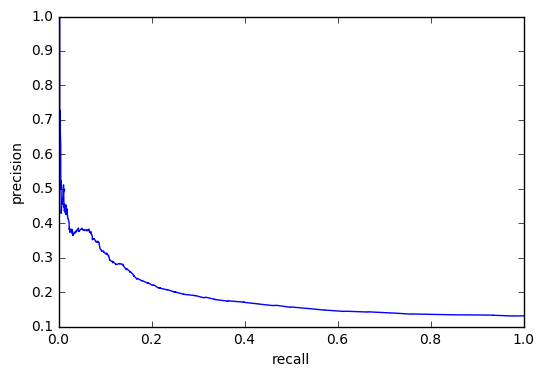

In [198]:
plt.plot(recall,pre)
plt.xlabel('recall')
plt.ylabel('precision')

In [199]:
from sklearn.metrics import roc_auc_score

In [200]:
roc_auc_score(ytrue,pred)

0.5641048588895442

In [201]:
clf.feature_importances_

array([ 0.03277986,  0.03544257,  0.03311977,  0.04671747,  0.05816818,
        0.03265847,  0.19250278,  0.0817787 ,  0.23628698,  0.15340661,
        0.09713861])

In [243]:
df2 = pd.get_dummies(df2,columns=['sex','occupation','education','marriage','household'])

In [244]:
xdata = df2.drop(['user_id','target'],axis=1)
ydata = df2['target']

In [245]:
from sklearn.cross_validation import train_test_split

In [246]:
xtrain,xtest,ytrain,ytest = train_test_split(xdata,ydata,train_size=0.7)

In [249]:
from sklearn.preprocessing import StandardScaler

In [250]:
ss = StandardScaler()

In [251]:
ss.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [252]:
trainx = ss.transform(xtrain)
testx = ss.transform(xtest)

In [ ]:
#logistic回归

In [247]:
from sklearn.linear_model import LogisticRegression

In [248]:
clf = LogisticRegression()

In [253]:
clf.fit(trainx,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [254]:
clf.predict_proba(testx)

array([[ 0.62048629,  0.37951371],
       [ 0.91380718,  0.08619282],
       [ 0.89879794,  0.10120206],
       ..., 
       [ 0.89768013,  0.10231987],
       [ 0.89031611,  0.10968389],
       [ 0.91617578,  0.08382422]])

In [255]:
from sklearn.metrics import precision_recall_curve

In [256]:
yture = ytest

In [257]:
pred = clf.predict_proba(testx)[:,1]

In [258]:
pre,recall,thre = precision_recall_curve(yture,pred)

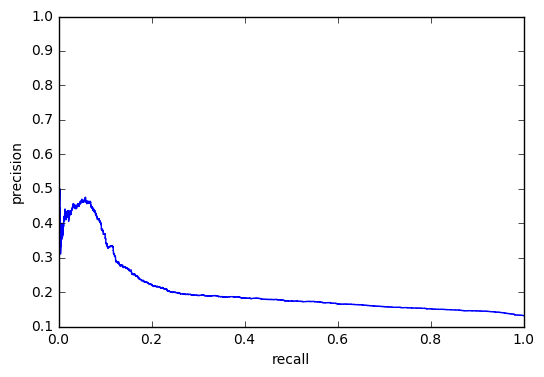

In [259]:
plt.plot(recall,pre)
plt.xlabel('recall')
plt.ylabel('precision')

In [260]:
from sklearn.metrics import roc_auc_score

In [261]:
roc_auc_score(yture,pred)

0.60759311331738686

In [134]:
cd C:\Users\xupu\Desktop\个人征信\test

C:\Users\xupu\Desktop\个人征信\test


In [135]:
user_info = pd.read_csv('user_info_test.txt',header=None,names=['user_id','sex','occupation','education','marriage','household'])

In [136]:
bank_detail = pd.read_csv('bank_detail_test.txt',header=None,names=['user_id','tm_encode','trade_type','trade_amount','salary_tag'])

In [137]:
grouped0 = bank_detail.groupby(['user_id','trade_type'])

In [138]:
income = grouped0['trade_amount'].sum().unstack()

In [139]:
income.rename(columns={0:'shouru',1:'zhichu'},inplace = True)

In [140]:
income['netincome'] = income['shouru']-income['zhichu']

In [141]:
incomes = income['netincome']

In [142]:
tag1 = bank_detail.loc[bank_detail['salary_tag']==1]

In [143]:
salary = tag1.groupby('user_id')['trade_amount'].mean()

In [144]:
bank = pd.concat([incomes,salary],axis=1)

In [145]:
new_bank = bank.reset_index()

In [146]:
new_bank.loc[new_bank['trade_amount'].isnull(),'tag']=0
new_bank.loc[new_bank['trade_amount'].notnull(),'tag']=1

In [147]:
new_bank.head()

,user_id,netincome,trade_amount,tag
0,55597,-15.533708,NaN,0.0
1,55599,-8077.756939,NaN,0.0
2,55602,-1808.478992,NaN,0.0
3,55612,-1593.508769,15.201603,1.0
4,55621,-1034.962776,NaN,0.0


In [148]:
bill_detail = pd.read_csv('bill_detail_test.txt',header=None,names=['user_id','tm_encode','bank_id','last_bill','last_return','credit_amount','this_bill_left','minreturn_bill','use_times','this_bill_amount','adjust_amount','recircle_rate','left_amount','load_amount','return_item'])

In [149]:
bill_detail['last_return_diff']=bill_detail['last_return']-bill_detail['last_bill']

In [150]:
bill_detail = bill_detail.drop(['tm_encode','last_bill','last_return','minreturn_bill','use_times','adjust_amount'],axis=1)

In [151]:
grouped2 = bill_detail.groupby('user_id')

In [152]:
crdits = grouped2['bank_id'].unique()

In [153]:
c = pd.DataFrame(columns=['user_id','cards'])
for index in crdits.index:
    c = c.append(pd.Series({'user_id':index,'cards':len(crdits[index])}),ignore_index=True)

In [154]:
c['user_id']=c['user_id'].astype(np.int64)

In [155]:
grouped1 = bill_detail.groupby(['user_id','bank_id'])

In [156]:
credit_amount = (grouped1['credit_amount'].sum())/(grouped1['credit_amount'].size())

In [157]:
credit_amounts = pd.DataFrame(credit_amount).reset_index()

In [158]:
credit_amounts.rename(columns={0:'edu'},inplace=True)

In [159]:
user_credit_amount = pd.DataFrame(credit_amounts.groupby('user_id')['edu'].sum())

In [160]:
user_credit_amount = user_credit_amount.reset_index()

In [161]:
user_rate = grouped2['recircle_rate','last_return_diff'].sum().reset_index()

In [162]:
user_loan = pd.DataFrame(grouped2['load_amount'].mean()).reset_index()

In [163]:
d = pd.merge(c,user_credit_amount,on='user_id')
e = pd.merge(d,user_rate,on='user_id')
f = pd.merge(e,user_loan,on='user_id') #合并到总表

In [164]:
df3 = pd.merge(user_info,f,on='user_id',how='left')

In [165]:
df4 = pd.merge(df3,new_bank,on='user_id',how='left')

In [166]:
df4['user_id']

0        57189
1        59778
2        59779
3        64690
4        63295
5        66243
6        67255
7        57736
8        57190
9        68003
10       64010
11       57737
12       68751
13       66779
14       62022
15       63296
16       58696
17       57738
18       62662
19       59780
20       64691
21       65336
22       60995
23       57739
24       58397
25       60385
26       55961
27       61587
28       63297
29       62023
         ...  
13869    69466
13870    69467
13871    69468
13872    69469
13873    69470
13874    69471
13875    69472
13876    69473
13877    69474
13878    69475
13879    69476
13880    69477
13881    69478
13882    69479
13883    69480
13884    69481
13885    69482
13886    69483
13887    69484
13888    69485
13889    69486
13890    69487
13891    69488
13892    69489
13893    69490
13894    69491
13895    69492
13896    69493
13897    69494
13898    69495
Name: user_id, dtype: int64

In [202]:
X = df4.drop('user_id',axis=1)

In [203]:
X.shape

(13899, 11)

In [204]:
X.head()

,sex,occupation,education,marriage,household,cards,edu,recircle_rate,last_return_diff,load_amount,netincome
0,1,2,4,3,2,4.0,75.626539,0.000000,-121.166882,7.565612,-2928.413552
1,1,2,3,1,4,4.0,80.667615,47.949803,73.076005,11.983777,-3266.814389
2,1,2,4,1,2,1.0,19.971271,0.000000,0.000000,0.000000,NaN
3,1,2,4,2,1,1.0,20.713929,0.000000,73.743373,20.020781,NaN
4,1,2,3,2,2,NaN,NaN,NaN,NaN,NaN,-1513.756155


In [205]:
X['netincome'].fillna(X['netincome'].mean(),inplace=True)

In [171]:
X['trade_amount'].fillna(0,inplace=True)
X['tag'].fillna(0,inplace=True)

In [206]:
X=X.fillna(X.mean(),inplace=True)

In [207]:
predict = clf.predict_proba(X)[:,1]

In [208]:
predict

array([ 0.51 ,  0.475,  0.37 , ...,  0.415,  0.54 ,  0.5  ])

In [209]:
predict = pd.Series(predict)

In [210]:
result = pd.concat([df4['user_id'],predict],axis=1)

In [211]:
result = result.rename(columns={'user_id':'userid',0:'probability'})

In [212]:
result.to_csv('C:\\Users\\xupu\\Desktop\\xupu6.csv',index=False)

In [269]:
testX = pd.get_dummies(X,columns=['sex','occupation','education','marriage','household'])

In [272]:
testX = ss.transform(testX)

In [273]:
testX

array([[ 0.67358809,  0.97022784, -0.29946692, ...,  1.5997702 ,
        -0.41628637, -0.58924953],
       [ 0.67358809,  1.12583621, -0.13754571, ..., -0.62508978,
        -0.41628637,  1.6970739 ],
       [-0.90131457, -0.74774372, -0.29946692, ...,  1.5997702 ,
        -0.41628637, -0.58924953],
       ..., 
       [ 0.67358809,  0.80176934, -0.29946692, ..., -0.62508978,
        -0.41628637,  1.6970739 ],
       [-0.90131457, -0.73240906,  1.07547253, ...,  1.5997702 ,
        -0.41628637, -0.58924953],
       [-0.90131457, -0.7263476 , -0.29946692, ..., -0.62508978,
        -0.41628637, -0.58924953]])

In [285]:
predict = clf.predict_proba(testX)[:,1]

In [288]:
predict = pd.Series(predict)

In [293]:
type(df4['user_id'])

pandas.core.series.Series

In [294]:
type(predict)

pandas.core.series.Series

In [319]:
result = pd.concat([df4['user_id'],predict],axis=1)

In [320]:
result = result.rename(columns={'user_id':'userid',0:'probability'})

In [308]:
result.shape

(13899, 2)

In [311]:
testID = pd.read_csv('usersID_test.txt',header=None)

In [312]:
testID.shape

(13899, 1)

In [321]:
result.head()

,userid,probability
0,57189,0.145972
1,59778,0.085161
2,59779,0.173240
3,64690,0.164181
4,63295,0.150060


In [322]:
result.to_csv('C:\\Users\\xupu\\Desktop\\xupu3.csv',index=False)

In [58]:
# browse_history = pd.read_csv('browse_history_train.txt',header=None,names=['user_id','tm_encode_2','browse_data','browse_tag'])
# loan_time = pd.read_csv('loan_time_train.txt',header=None,names=['user_id','loan_time'])